<a href="https://colab.research.google.com/github/mkane968/Text-Mining-Experiments/blob/main/NLTK/Intro_to_NLTK_Using_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to NLTK Using Colab

By Megan Kane

This tutorial will walk through basic text processing and analysis methods from the Natural Language Toolkit. 

This tutorial is indebted to the following: 

https://www.nltk.org/book/

https://github.com/hb20007/hands-on-nltk-tutorial 

https://realpython.com/nltk-nlp-python/ 

https://github.com/luchux/ipython-notebook-nltk/blob/master/NLP%20-%20MelbDjango.ipynb 

https://colab.research.google.com/github/alvinntnu/NTNU_ENC2045_LECTURES/blob/main/nlp/text-enrichment.ipynb 

#Download Libraries, Packages and Corpora
To prepare for text analysis, install and import necessary libraries, packages and corpora. You will need to run ! pip install for those not in Colab by default.

In [4]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import nltk.corpus
from nltk.corpus import brown, stopwords, names, movie_reviews, subjectivity
nltk.download('brown')
nltk.download('stopwords')
nltk.download('names')
nltk.download('movie_reviews')
nltk.download('subjectivity')
import string 
from string import punctuation
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.
from nltk.stem import (PorterStemmer, LancasterStemmer)
nltk.download('wordnet')
from nltk import WordNetLemmatizer, bigrams, trigrams, FreqDist, ngrams, NaiveBayesClassifier, MaxentClassifier, pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
import matplotlib
matplotlib.use('Agg')
nltk.download("maxent_ne_chunker")
nltk.download("words")
from nltk.text import Text
import matplotlib
import matplotlib.pyplot
import numpy as np
import random
from nltk.classify import accuracy
from nltk.metrics.scores import (precision, recall, f_measure)
from nltk.metrics import edit_distance
import collections
import itertools
from random import shuffle
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import (mark_negation, extract_unigram_feats) 
from nltk.sentiment import SentimentAnalyzer # SentimentAnalyzer is a tool to implement and facilitate Sentiment Analysis.
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]      

True

# Text Tokenization
NLTK analysis involves working with small units of text such as words and sentences. Tokenization is the process used to split up full text into parts.

##Sentence Tokenization
Convert a passage into sentence and assign it to variable "tokens": 

In [5]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
sent_tokens = sent_tokenize(my_string)
sent_tokens

["Two plus two is four, minus one that's three — quick maths.",
 "Every day man's on the block.",
 'Smoke trees.',
 'See your girl in the park, that girl is an uckers.',
 'When the thing went quack quack quack, your men were ducking!',
 'Hold tight Asznee, my brother.',
 "He's got a pumpy.",
 'Hold tight my man, my guy.',
 "He's got a frisbee.",
 'I trap, trap, trap on the phone.',
 'Moving that cornflakes, rice crispies.',
 'Hold tight my girl Whitney.']

##Word Tokenization
You can also convert sentences (or whole passages) into word tokens. The first five word tokens of the passage are shown below.

In [6]:
word_tokens = word_tokenize(my_string)
word_tokens[:10]

['Two', 'plus', 'two', 'is', 'four', ',', 'minus', 'one', 'that', "'s"]

Note that punctuation and 's are recognized as tokens here. Depending on the goals of your analysis, you may want to filter out these tokens and others (see next section for more details). 

Tokenization can be done for a whole file or corpus of files. Many NLTK corpora have already been tokenized. Let's retrieve the tokenized words from the news documents in the [Brown corpus](https://www.nltk.org/book/ch02.html):

In [7]:
news_text = brown.words(categories='news')
news_text[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

You can also tokenize a file (or corpus) uploaded from your local machine. Use this code to upload a document file of your choice and convert it into  tokens. 

In [9]:
#Import file importer
from google.colab import files

#Run file upload (Click "Choose files" to browse and select local file)
uploaded = files.upload()

Saving Telespond Position Opening_ Personal Care Attendant 1-4 pg ad.docx to Telespond Position Opening_ Personal Care Attendant 1-4 pg ad (1).docx


In [14]:
#Convert document into string
uploaded= str(uploaded)

#Convert document into word tokens and print first ten tokens
word_tokens = word_tokenize(uploaded)
word_tokens[:10]

['{',
 "'Telespond",
 'Position',
 'Opening_',
 'Personal',
 'Care',
 'Attendant',
 '1-4',
 'pg',
 'ad.docx']

Below, we will be working with the tokenized version of the Brown corpus. For the most part, word tokens will be of more use than sentence tokens. 

TALK ABOUT WHEN SENTENCE TOKENS CAN BE ANALYZED

#Text Cleaning and Enrichment

NLTK features several tools for cleaning (lowercasing, removing stopwords and punctuation, stemming and lemmatization) and enriching text (part of speech tagging, grammatical chunking, named entity recognition, n-gram generation). 

##Remove Stopwords

First, you may clean your text of words that will not be useful to count in analysis. 
**Stopwords**, very common words which do not add much meaning to the text, are often removed. 

The code below remove all stopwords from "my_string." The new variable, "my_string_cleaned," includes only words which do NOT appear in the NLTK stopword dictionary (stopwords.words). Words in the new string have also been lowercased.

In [24]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
word_tokens = word_tokenize(my_string)


my_string_cleaned = [w.lower() for w in word_tokens if w.lower() not in stopwords.words('english')]
my_string_cleaned[:10]

['two', 'plus', 'two', 'four', ',', 'minus', 'one', "'s", 'three', '—']

The same can be done for a file or collection of files; let's clean the Brown corpus. We'll also lowercase all words in the corpus, since some basic text analysis functions are case-sensitive. 

In [21]:
#Clean Brown corpus of stopwords and assign to new variable
news_text_nostop = [w.lower() for w in news_text if w.lower() not in stopwords.words('english')]
news_text_nostop[:10]

['fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'investigation',
 "atlanta's",
 'recent',
 'primary']

##Remove Punctuation

Removing punctuation is another common cleaning step. Here all tokens are kept which are NOT in two punctuation lists (string.punctuation and punct_combo)

In [25]:
punct_combo = [c + "\"" for c in string.punctuation ] + ["\"" + c for c in string.punctuation] + ["—",".-", ":-", "..", "...","'s", "``", "''"]
my_string_cleaned= [w for w in my_string_cleaned if w not in string.punctuation and w not in punct_combo]
my_string_cleaned[:10]

['two',
 'plus',
 'two',
 'four',
 'minus',
 'one',
 'three',
 'quick',
 'maths',
 'every']

We'll do the same for the Brown corpus. We can do this using the original text,and since cleaning methods build on each other, we'll also remove the punctuation from the text we have just cleaned of stopwords. 

In [37]:
#Clean original Brown text
news_text_nopunct= [w for w in news_text if w not in string.punctuation and w not in punct_combo]
news_text_nopunct[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [36]:
#Clean Brown corpus without stopwords
news_text_nostop_nopunct= [w for w in news_text_nostop if w not in string.punctuation and w not in punct_combo]
news_text_nostop_nopunct[:10]

['fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'investigation',
 "atlanta's",
 'recent',
 'primary']

##Stemming and Lemmatization

Depending on your analysis goals, you may also want to reduce words to their roots (stemming) or core meanings (lemmatization).

First, let's test out three stemming tools: the Porter Stemmer, Lancaster Stemmer, and Snowball Stemmer. [Learn more about the differences between them here.](https://machinelearningknowledge.ai/beginners-guide-to-stemming-in-python-nltk/)

In [29]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")
#Test on word "re-test"
print(porter.stem('Re-testing'), lancaster.stem('Re-testing'), snowball.stem('Re-testing'))

re-test re-testing re-test


Use each to stem the first 100 words in the news category of the Brown corpus (using the version of the corpus we have just cleaned of stopwords and punctuation).

In [30]:
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in news_text_cleaned])

['fulton', 'counti', 'grand', 'juri', 'said', 'friday', 'investig', "atlanta'", 'recent', 'primari', 'elect', 'produc', 'evid', 'irregular', 'took', 'place', 'juri', 'said', 'term-end', 'present', 'citi', 'execut', 'committe', 'over-al', 'charg', 'elect', 'deserv', 'prais', 'thank', 'citi', 'atlanta', 'manner', 'elect', 'conduct', 'september-octob', 'term', 'juri', 'charg', 'fulton', 'superior', 'court', 'judg', 'durwood', 'pye', 'investig', 'report', 'possibl', 'irregular', 'hard-fought', 'primari', 'mayor-nomin', 'ivan', 'allen', 'jr.', 'rel', 'hand', 'report', 'receiv', 'juri', 'said', 'consid', 'widespread', 'interest', 'elect', 'number', 'voter', 'size', 'citi', 'juri', 'said', 'find', 'mani', "georgia'", 'registr', 'elect', 'law', 'outmod', 'inadequ', 'often', 'ambigu', 'recommend', 'fulton', 'legisl', 'act', 'law', 'studi', 'revis', 'end', 'modern', 'improv', 'grand', 'juri', 'comment', 'number', 'topic', 'among', 'atlanta', 'fulton', 'counti', 'purchas', 'depart', 'said', 'well

In contrast to to stemming, lemmatization aims to derive the genuine dictionary root word, not just a truncated version of the word. 

The default lemmatization method with the Python NLTK is the WordNet lemmatizer. Let's use it to lemmatize the same tokens from the Brown corpus. 

In [31]:
wnl = WordNetLemmatizer()

print([wnl.lemmatize(t) for t in news_text_cleaned])

['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', "atlanta's", 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularity', 'took', 'place', 'jury', 'said', 'term-end', 'presentment', 'city', 'executive', 'committee', 'over-all', 'charge', 'election', 'deserves', 'praise', 'thanks', 'city', 'atlanta', 'manner', 'election', 'conducted', 'september-october', 'term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'report', 'possible', 'irregularity', 'hard-fought', 'primary', 'mayor-nominate', 'ivan', 'allen', 'jr.', 'relative', 'handful', 'report', 'received', 'jury', 'said', 'considering', 'widespread', 'interest', 'election', 'number', 'voter', 'size', 'city', 'jury', 'said', 'find', 'many', "georgia's", 'registration', 'election', 'law', 'outmoded', 'inadequate', 'often', 'ambiguous', 'recommended', 'fulton', 'legislator', 'act', 'law', 'studied', 'revised', 'end', 'modernizing', 'improving', 'grand', 'jur

Sometimes, if we try to lemmatize a word, it will end up with the same word. This is because the default part of speech is nouns. Indicate the part of speech for more accurate results.

In [32]:
wnl.lemmatize('brightening', pos='v')

'brighten'

At this point, we have several corpora to work with for our remaining analysis: 



```
news_text = Original versions of news texts in the Brown corpus 
```
```
news_text_nostop = Brown corpus news texts cleaned of stopwords
```
```
news_text_nopunct = Brown corpus news texts cleaned of punctuation
```
```
news_text_nostop_nopunct = Brown corpus news texts cleaned of stopwords and punctuation
```

You will want to choose your corpus carefully, depending on the type of analysis conducted. Below, the reason behind the choice of corpus used in each analysis will be discussed, but feel free to choose different variables and see how it impacts the results. 

##Part of Speech (POS) Tagging

NLTK enables the labeling of all words in a text according to their part of speech. Let's label the file from the brown corpus and print the first 10 tagged tokens. We'll use the file including stop words since stop words comprise meaningful parts of speech. 

In [38]:
brown_pos = nltk.pos_tag(news_text)
print(brown_pos[:10])

[('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('an', 'DT'), ('investigation', 'NN'), ('of', 'IN')]


Not sure what the POS tags mean? Retrieve the list of tags and their meanings.

In [ ]:
#nltk.help.upenn_tagset()
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


##Chunking

NLTK also allows for the identification of phrases in a text through the process of **chunking.** Usually, each chunk contains a head and (optionally) additional words and modifiers. Examples of chunks include noun groups and verb groups.

To chunk a text, it must first be labeled by a POS tagger (done above).

Then, we need to define a **[chunk grammar,](https://www.nltk.org/book_1ed/ch07.html)** consisting of rules that indicate how sentences should be chunked.

Below, a simple grammar for a noun phrase (NP) chunker is defined with a single regular-expression rule. This rule says that an NP chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN).

In [ ]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

Next, create a parser to identify chunks in a text based on the grammar defined above.

In [ ]:
chunk_parser = nltk.RegexpParser(grammar)

Finally, we'll run the chunk parser on our tagged Brown corpus text. 

In [ ]:
tree = chunk_parser.parse(brown_pos)

We can visualize the chunks using draw(). We first need to create a virtual environment and then display the visualized chunks. 

In [ ]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0. 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk
from nltk.tree import Tree
from IPython.display import display

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.15).
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


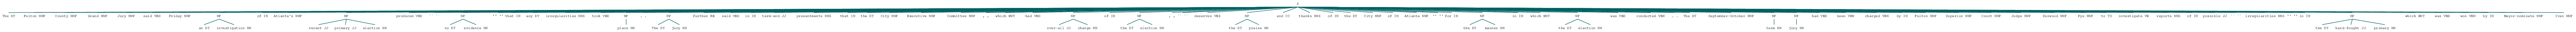

In [ ]:
display(tree)

##Named Entity Recognition (NER)

NLTK also enables the recognition of **named entities** like people, locations, and times. Let's tag and visualize the named entities in the Brown text

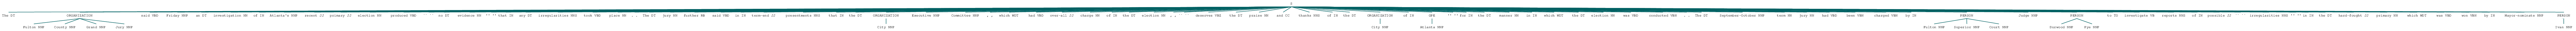

In [ ]:
tree = nltk.ne_chunk(brown_pos)
display(tree)

You can also retrieve a list of named entities in a text by creating a function. In this function, four entities were extracted from the Brown corpus text. 

In [ ]:
def extract_ne(brown_pos):
    tree = nltk.ne_chunk(brown_pos, binary=True)
    return set(
        " ".join(i[0] for i in t)
        for t in tree
        if hasattr(t, "label") and t.label() == "NE"
    )

extract_ne(brown_pos)

{'Atlanta',
 'City Executive Committee',
 'Fulton County Grand Jury',
 'Fulton Superior Court'}

##Get N-Grams

Finally, NLTK can detect n-grams, or strings of n items in a text. The most popular n-grams examined are bigrams and trigrams; larger patterns are less common across texts and thus less useful in analysis. Let's retrieve bigrams and trigrams in the Brown corpus text (cleaned for punctuation; stopwords included). 

In [ ]:
news_text_cleaned_punct = [w for w in news_text_cleaned if w not in string.punctuation and w not in punct_combo]

bi_news_text = list(bigrams(news_text_cleaned_punct))
print(bi_news_text)
tri_news_text = list(trigrams(news_text_cleaned_punct))
print(tri_news_text)

[('fulton', 'county'), ('county', 'grand'), ('grand', 'jury'), ('jury', 'said'), ('said', 'friday'), ('friday', 'investigation'), ('investigation', "atlanta's"), ("atlanta's", 'recent'), ('recent', 'primary'), ('primary', 'election'), ('election', 'produced'), ('produced', 'evidence'), ('evidence', 'irregularities'), ('irregularities', 'took'), ('took', 'place'), ('place', 'jury'), ('jury', 'said'), ('said', 'term-end'), ('term-end', 'presentments'), ('presentments', 'city'), ('city', 'executive'), ('executive', 'committee'), ('committee', 'over-all'), ('over-all', 'charge'), ('charge', 'election'), ('election', 'deserves'), ('deserves', 'praise'), ('praise', 'thanks'), ('thanks', 'city'), ('city', 'atlanta'), ('atlanta', 'manner'), ('manner', 'election'), ('election', 'conducted'), ('conducted', 'september-october'), ('september-october', 'term'), ('term', 'jury'), ('jury', 'charged'), ('charged', 'fulton'), ('fulton', 'superior'), ('superior', 'court'), ('court', 'judge'), ('judge', 

Both tokens and n-grams can be examined in basic text analysis. 

# Basic Text Analysis

A variety of basic text analyses can be conducted through NLTK, including length, count, index, concordances, collocations, distributional similarity, dispersion plots, most frequent vocab, and common contexts. 

##Get Length

Len() retrieves length of text or corpus.

In [ ]:
news_text = Text(brown.words(categories='news'))
len(news_text)

##Get Count

Count() retrieves frequency of word appearances. 

In [ ]:
news_text.count('jury')

##Get Index

Index() finds the position of a word in a text.

In [ ]:
news_text.index("jury")

##Concordancing

Concordance() finds and displays each time a word is used and its immediate contexts. Let's perform a concordance on a file in the Brown corpus to explore contexts where "jury" is used.

In [ ]:
news_text.concordance('jury')

##Collocations

Collocation() allows you to find multiple words which commonly co-occur. 

In [ ]:
news_text.collocations() 

Using a lemmatized list of words may pick up more instances of the same root words. 

In [ ]:
lemmatized_words = [wnl.lemmatize(word) for word in news_text]
news_text_lemmatized = nltk.Text(lemmatized_words)
news_text_lemmatized.collocations()

##Distributional Similarity

Similar() retrieves distributional similarity, or other words which appear in the same contexts as the specified word. Most similar words are listed first.

In [ ]:
news_text_lemmatized.similar('jury') #similar(self, word, num=20)

##Dispersion Plot

Create a dispersion plot to find and plot instances of word(s) as distributed across text. Dispersion plots reveal patterns in word positions. Each stripe represents an instance of a word, and each row represents the entire text.

In [ ]:
news_text.dispersion_plot(['jury', 'judge', 'trial'])

##Frequency Distribution

FreqDist() retrieves the most common tokens in a text or corpus. 

In [ ]:
frequency_distribution = FreqDist(news_text)
print(frequency_distribution)
#Since the corpus is so large, let's retrieve the 10 most common tokens.
frequency_distribution.most_common(10)

Most tokens in this initial analysis are stopwords or punctuation features; let's run FreqDist() on a cleaned corpus. 

In [ ]:
news_text_cleaned = [w.lower() for w in news_text_condensed if w.lower() not in stopwords.words('english')]
news_text_cleaned = [w for w in news_text_cleaned if w not in string.punctuation and w not in punct_combo]

frequency_distribution = FreqDist(news_text_cleaned)
frequency_distribution.most_common(10)

##Frequency Plots

Create a frequency plot to plot the most common tokens in a text or corpus.

In [ ]:
frequency_distribution.plot(10, cumulative=True)

Here is a plot of the most frequent bigrams in the corpus. 

In [ ]:
bi_fdist = FreqDist(bi_news_text)

for word, frequency in bi_fdist.most_common(3):
    print(word, frequency)

bi_fdist.plot(3, cumulative=False)

##Get Vocab

Vocab() finds the frequency of each word in the text.

In [ ]:
#Prints a long list of words!
#news_text_lemmatized.vocab()

##Get Common Contexts

Given two words in a text, common_contexts() displays where they are used similarly. 

In [ ]:
news_text.common_contexts(['county', 'state']) 

#Text Classification

NLTK enables several types of feature classification. Below, Naive Bayes and maximum entropy classifiers will be used to sort names by gender and texts into genre and sentiment categories. Two other tools for sentiment analysis, SentimentAnalyzer and Vader will also be explored.

##Name Gender Identification with Naive Bayes Classifers 

A classifier can be built to predict gender based on the last letter of a name.

First, build a feature extractor to retrieve the last letter of a word. The returned dictionary is called a feature set.

In [ ]:
def gender_features(word):  
    return {'last_letter': word[-1]}

gender_features('John')

To build the classifier, we need to prepare a list of examples and corresponding class labels. Retrieve examples from "female.txt" and "male.txt" in the NLTK names corpus and create a list of labeled names. 

In [ ]:
#Open and clean names corpus
names.readme().replace('\n', ' ')

#Get files in names corpus
names.fileids()

#Print first 5 words in female names text file
print(names.words('female.txt')[:5])

#Create list of labeled names where names in female.txt file are labeled female and male.txt names labeled male
labeled_names = ([(name, 'female') for name in names.words('female.txt')] + [(name, 'male') for name in names.words('male.txt')])

#Print first five in labeled names list
labeled_names[:5]

Both training and testing data are needed for the classifier, so shuffle names in labeled_names

In [ ]:
random.shuffle(labeled_names) 
labeled_names[:5]

Next, create a list of the last letter of each name in labeled names and thecorresponding gender; this is the information will be used to train and test the classifier. 

In [ ]:
#Extract last letter of each name in labeled_names and place in list along with gender
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]

#Check length of new list
print(len(featuresets))

#Print first five entires in new list
(featuresets[:5])

Split the featuresets lists into a training set (80% of list) and a test set (20% of list). We also need the names from the training set, to be used later. 

In [ ]:
#Split featuressets into test and training sets
TRAIN_SET_SIZE = round(len(featuresets) * .8)
train_set, test_set = featuresets[:TRAIN_SET_SIZE], featuresets[TRAIN_SET_SIZE:]

#Store names in test set in new variable
test_names = labeled_names[TRAIN_SET_SIZE:]

It's now time to define the classifier. In this case, we will be deploying a [Naive Bayes Classifer ](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c), which will use the data from the training set (last letters of male and female names) to predict whether new names given to it are male or female.

In [ ]:
#Define classifier as "trained" on training set
classifier = NaiveBayesClassifier.train(train_set)

Some notes: 

When working with large corpora, constructing a single list that contains the features of every instance can use up a large amount of memory.

In these cases, use the function nltk.classify.apply_features, which returns an object that acts like a list but does not store all the feature sets in memory:

from nltk.classify import apply_features

train_names, test_names = labeled_names[:round(len(featuresets) * .8)], labeled_names[round(len(featuresets) * .8):]

train_set = apply_features(gender_features, labeled_names[500:])

test_set = apply_features(gender_features, labeled_names[:500])

Now that the classifier has "trained" on the training data, we can learn what features are most influential to its classification decisions. In this case, the ratios indicate how likely a name with a given last letter would be classified as male or female.

In [ ]:
classifier.show_most_informative_features(10) 

Now, "test" the classifier on its ability to classify male and female names in the test set accurately.

In [ ]:
#Print labels of classifier (should be male and female)
print(classifier.labels())

#Print accuracy of classifier when deployed on test set
print(round(accuracy(classifier, test_set), 2))

Individual names can also be given to the classifier to judge its accuracy.

In [ ]:
#Test classifier on female name based on last letter of name
print(classifier.classify(gender_features('Aphrodite')))

#Test classifier on male name based on last letter of name
print(classifier.classify(gender_features('Zeus')))

Classifier accuracy may increase if the classifier was built to consider more features. Let's define a classifier which lowercases the first and last letter of each name and identifies which letters are contained in the name and at what frequency.

In [ ]:
#Returns new classifier
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

#Returns new features for John (long list!)
#gender_features2('John')

#Retrieve features for list of gendered names and put in new list
featuresets2 = [(gender_features2(n), gender) for (n, gender) in labeled_names]

#Print first item in list (long list!)
#featuresets2[0]

Now the new classifier can be trained on the same set of male and female names of above and its accuracy can be obtained. Having too many specific features on a small dataset may lead to overfitting, but it seems the classifier was good at avoiding that since its performance is slightly better.

In [ ]:
train_set2, test_set2 = featuresets2[:TRAIN_SET_SIZE], featuresets2[TRAIN_SET_SIZE:]
classifier2 = NaiveBayesClassifier.train(train_set2)
round(accuracy(classifier2, test_set2), 2)

Explore the most influential features on this classifier's decisions. Indeed, it seems the classifier is still mainly using the last letter, along with some other features that happen to improve the accuracy.

In [ ]:
classifier2.show_most_informative_features(15)

Now we can compare the performance of the two classiifers. 

Before we start, here's a useful function for comparing strings:

Edit distance is the number of characters that need to be substituted, inserted, or deleted, to transform s1 into s2.

In [ ]:
edit_distance("John", "Joan")

The NLTK metrics module provides functions for calculating metrics beyond mere accuracy to compare the two classifiers. But in order to do so, we need to build 2 sets for each classification label: a reference set of correct values, and a test set of observed values.

In [ ]:
# Classifier 1
refsets = collections.defaultdict(set) # For what this is: https://stackoverflow.com/questions/5900578/how-does-collections-defaultdict-work
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)
    
# Classifier 2
refsets2 = collections.defaultdict(set)
testsets2 = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_set2):
    refsets2[label].add(i)
    observed = classifier2.classify(feats)
    testsets2[observed].add(i)

We can proceed to print the metrics for each classifier (precision, recall, f_measure). 

Note that we cannot get the accuracy in this manner. nltk.metrics.scores.accuracy(reference, test) works by comparing test[i] == reference[i] and our reference and test are not formatted in a way that allows for this.

It's the same for the confusion matrix.

In [ ]:
args = (
    round(precision(refsets['female'], testsets['female']), 2),
    round(precision(refsets['male'], testsets['male']), 2),
    round(recall(refsets['female'], testsets['female']), 2),
    round(recall(refsets['male'], testsets['male']), 2),
    round(f_measure(refsets['female'], testsets['female']), 2),
    round(f_measure(refsets['male'], testsets['male']), 2)
)

args2 = (
    round(precision(refsets2['female'], testsets2['female']), 2),
    round(precision(refsets2['male'], testsets2['male']), 2),
    round(recall(refsets2['female'], testsets2['female']), 2),
    round(recall(refsets2['male'], testsets2['male']), 2),
    round(f_measure(refsets2['female'], testsets2['female']), 2),
    round(f_measure(refsets2['male'], testsets2['male']), 2)
)

print('''
CLASSIFIER 1
------------ 
Female precision: {0}
Male precision: {1}
Female recall: {2}
Male recall: {3}
Female F1 score: {4}
Male F1 score: {5}

CLASSIFIER 2
------------ 
Female precision: {6}
Male precision: {7}
Female recall: {8}
Male recall: {9}
Female F1 score: {10}
Male F1 score: {11}
'''.format(*args, *args2))

After building classifiers, also conduct error analysis--investigating misclassified data. In this case, make a list for errors and load in classifications where the classifier's guess does not equal the gender tag.

In [ ]:
errors = []
for (name, tag) in test_names:
    guess = classifier2.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))

#Print first five misclassified names and tags
print(errors[:5])

#Print three columns (correct gender of name, guessed gender, and name itself)--LONG LIST!
#for (tag, guess, name) in sorted(errors):
  #print('Correct = {:8} guess = {:8} name = {}'.format(tag, guess, name)) # :8 creates spaces between columns.

Looking through this list of errors, it seems that some suffixes that are more than one letter long can be indicative of name genders. For example, names ending in "yn" appear to be predominantly female, despite the fact that names ending in "n" tend to be male; also, names ending in "ch" are usually male, even though names that end in "h" tend to be female.

We can use this information to build a new classifier with even more features. Here we'll define a classifier which counts first letter and last two letters of word.

In [ ]:
#Define new set of features (first letter and last two letters of each word)
def gender_features3(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["suffix1"] = name[-1].lower()
    features["suffix2"] = name[-2:].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

#gender_features3('John')

#Get features above for list of gendered names and put in list
featuresets3 = [(gender_features3(n), gender) for (n, gender) in labeled_names]

#print first item in list (Long List!)
#featuresets3[0]

Now train the classifier on same set of male and female names above and find its accuracy and most informative features.

In [ ]:
#Train new classifer
train_set3, test_set3 = featuresets3[:TRAIN_SET_SIZE], featuresets3[TRAIN_SET_SIZE:]
classifier3 = NaiveBayesClassifier.train(train_set3)

#Get accuracy of classifier
print(round(accuracy(classifier3, test_set3), 2))

#Print 15 most informative features for classification decisions
classifier3.show_most_informative_features(15)

As seen, this classifer's accuracy is improved, and the 2-letter suffixes are most indicative of the classification decisions. 

##Name Gender Identification with Maximum Entropy Classifier

Another type of classifier that can be deployed is a [maximum entropy classifer.](https://blog.datumbox.com/machine-learning-tutorial-the-max-entropy-text-classifier/#:~:text=What%20is%20the%20Max%20Entropy,conditionally%20independent%20of%20each%20other.)

Unlike the Naive Bayes classifier, the Maximum Entropy classifier does not assume that the features (in this case, first letters and suffixes) are conditionally independent from one another. It is based on the Principle of Maximum Entropy and selects, from all models that fit the training data, the one that has the has the largest entropy (is most unpredictable). 

The principle of maximum entropy is invoked when we have some piece(s) of information about a probability distribution, but not enough to characterize it completely—likely because we do not have the means or resources to do so. As an example, if all we know about a distribution is its average, we can imagine infinite shapes that yield a particular average. The principle of maximum entropy says that we should humbly choose the distribution that maximizes the amount of unpredictability contained in the distribution.

Taking the idea to the extreme, it wouldn’t be scientific to choose a distribution that simply yields the average value 100% of the time.

Due to the minimum assumptions that the Maximum Entropy classifier makes, it is usually used when we don’t know anything about the prior distributions and when it is unsafe to make any assumptions. As noted above, the maximum entropy classifier is used when we can’t assume the conditional independence of the features.

Build a maximum entropy classifier and have it iterate through models that fit the training data. The default value of maximum iterations is 100; in this example, the performance in terms of accuracy on the test set stops significantly improving beyond the previous model's at around 25 iterations.

In [ ]:
# max_iter has default value 100. 
me_classifier = MaxentClassifier.train(train_set3, max_iter=25) 

Then get the accuracy of the maximum entropy classifier on the TEST set and the most informative features.

In [ ]:
#Accuracy of ME classifier
print(round(accuracy(me_classifier, test_set3), 2))

#Most informative features
me_classifier.show_most_informative_features(10)

Naive Bayes and Maximum Entropy are just two of the classification methods enabled by NLTK. 

Scikit-learn (sklearn) is a popular library which features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

NLTK provides an API to quickly use sklearn classifiers in nltk.classify.scikitlearn. The other option is to import and use sklearn directly.

For an example of integrating sklearn with NLTK, you can check out [this notebook on Kaggle.](https://www.kaggle.com/alvations/basic-nlp-with-nltk) Kaggle is a great website for NLP and machine learning in general, creating an account is highly recommended.

##Genre Categorization with Naive Bayes Classifier

Based on "Another Excercise: Classifying News Documents in Categories: sport, humor, adventure, science fiction, etc..." in [Natural Language Processing with Python/NLTK by Luciano M. Guasco](https://github.com/luchux/ipython-notebook-nltk/blob/master/NLP%20-%20MelbDjango.ipynb)

The aim here is to build a classifier to sort texts in the Brown corpus into genre categories based on the most frequent words used. [Learn more about the Brown corpus here. ](https://www.nltk.org/book/ch02.html)

First, prepare the Brown corpus for classification analysis.

In [ ]:
#Clean spacing
brown.readme().replace('\n', ' ')

#Get file ids
#brown.fileids()

#Get categories (genres of text) in Brown corpus
brown.categories()

Next, compile a list of the most popular words in the corpus. Then sort the words into a mutable list and sort them based on frequency

In [ ]:
# Check if the word is alphabetical avoids including stuff like `` and '' which are actually pretty common. 
# Note that it also omits words such as 1 (very common), aug., 1913, $30, 13th, over-all etc. Another option would have been .isalnum().
words_in_corpora = FreqDist(w.lower() for w in brown.words() if w.isalpha()) 

#Put most frequent words in mutable list
words_in_corpora_freq_sorted = list(map(list, words_in_corpora.items()))
#words_in_corpora_freq_sorted

#Sort words in list based on frequency
words_in_corpora_freq_sorted.sort(key=lambda x: x[1], reverse=True) # Using a lambda function is an alternative to using the operator library.

#Get 10 most frequent words
words_in_corpora_freq_sorted[:10]

Next, put the 1500 most frequent words in list into a new variable and delete word count (list item 1)

In [ ]:
#Create new variable for top 1500 words
best1500 = words_in_corpora_freq_sorted[:1500]

#Remove frequency counts
for list_item in best1500:
    del list_item[1]

#Print top 10 words in new variable
best1500[:10]

Since best1500 is now a list of words, it should be [flattened](https://stackabuse.com/python-how-to-flatten-list-of-lists/). Break down the list into its individual sublists and then use the chain() function. Chain further breaks down each sublist into its individual components, so this approach can be used to flatten any list of lists.

In [ ]:
chain = itertools.chain(*best1500) 
best1500 = list(chain) # chain is of type itertools.chain so we need the cast
best1500[:10]

Many of the top 1500 words were stopwords; these will now be removed from the list.

In [ ]:
stopw = stopwords.words('english')

def nonstop(listwords):
    return [word for word in listwords if word not in stopw]

best1500_words_corpora = nonstop(best1500) # Note how this will probably contain less than 1500 words.
best1500_words_corpora[:10]

Next, the documents in the corpus must be converted to forms suitable for classification. Each file in the corpus will eventually be represented by a dictionary showing the presence of the corpus’ most popular words in the particular file.

In [ ]:
# documents = [(nonstop(brown.words(fileid)), category) for category in brown.categories() for fileid in brown.fileids(category)]
# documents # Note how documents is a list of tuples.

# The code above generates a representation of the corpus but without removing punctuation. This is better:
documents = [([item.lower() for item in nonstop(brown.words(fileid)) if item.isalpha()], category)
             for category in brown.categories()
             for fileid in brown.fileids(category)]
#documents # Long List! Note how documents is a list of tuples

#Shuffle items in documents
shuffle(documents)

Now create a list of features to be used to train the classifier - in this case, the presence of the 1500 most frequent words in the corpus

In [ ]:
def document_features(doc):
    doc_set_words = set(doc) # Checking whether a word occurs in a set is much faster than checking whether it occurs in a list.
    features_dic = {} # Features is a dictionary
    for word in best1500_words_corpora:
        features_dic['has(%s)' % word] = (word in doc_set_words)
    return features_dic

doc_features_set = [(document_features(d),c) for (d,c) in documents]
#doc_features_set[0]

Now build the classifer to determine what category documents fall into based on the most frequent words.

In [ ]:
#Sort documents into training and test sets 
train_set = doc_features_set[:350] # Since the total is 500
test_set  = doc_features_set[150:]

#Run classifier on training set
classifier = NaiveBayesClassifier.train(train_set)

#Get accuracy of classifier
print(accuracy(classifier, test_set))

#Show most informative features
classifier.show_most_informative_features(15)

Test classification of documet 'ca01' (it is under the 'news' category)

In [ ]:
classifier.classify(document_features(brown.words('ca01')))

New texts can also be prepared for classificiation. 

In [ ]:
# The test text needs to be long enough in order to contain a significant amount of the 1500 most common words in our training corpus.
text = "1 God, infinitely perfect and blessed in himself, in a plan of sheer goodness freely created man to make him share in his own blessed life. For this reason, at every time and in every place, God draws close to man. He calls man to seek him, to know him, to love him with all his strength. He calls together all men, scattered and divided by sin, into the unity of his family, the Church. To accomplish this, when the fullness of time had come, God sent his Son as Redeemer and Saviour. In his Son and through him, he invites men to become, in the Holy Spirit, his adopted children and thus heirs of his blessed life. 2 So that this call should resound throughout the world, Christ sent forth the apostles he had chosen, commissioning them to proclaim the gospel: \"Go therefore and make disciples of all nations, baptizing them in the name of the Father and of the Son and of the Holy Spirit, teaching them to observe all that I have commanded you; and lo, I am with you always, to the close of the age.\"4 Strengthened by this mission, the apostles \"went forth and preached everywhere, while the Lord worked with them and confirmed the message by the signs that attended it.\" 3 Those who with God's help have welcomed Christ's call and freely responded to it are urged on by love of Christ to proclaim the Good News everywhere in the world. This treasure, received from the apostles, has been faithfully guarded by their successors. All Christ's faithful are called to hand it on from generation to generation, by professing the faith, by living it in fraternal sharing, and by celebrating it in liturgy and prayer. 4 Quite early on, the name catechesis was given to the totality of the Church's efforts to make disciples, to help men believe that Jesus is the Son of God so that believing they might have life in his name, and to educate and instruct them in this life, thus building up the body of Christ. Catechesis is an education in the faith of children, young people and adults which includes especially the teaching of Christian doctrine imparted, generally speaking, in an organic and systematic way, with a view to initiating the hearers into the fullness of Christian life. While not being formally identified with them, catechesis is built on a certain number of elements of the Church's pastoral mission which have a catechetical aspect, that prepare for catechesis, or spring from it. They are: the initial proclamation of the Gospel or missionary preaching to arouse faith; examination of the reasons for belief; experience of Christian living; celebration of the sacraments; integration into the ecclesial community; and apostolic and missionary witness. Catechesis is intimately bound up with the whole of the Church's life. Not only her geographical extension and numerical increase, but even more her inner growth and correspondence with God's plan depend essentially on catechesis. Periods of renewal in the Church are also intense moments of catechesis. In the great era of the Fathers of the Church, saintly bishops devoted an important part of their ministry to catechesis. St. Cyril of Jerusalem and St. John Chrysostom, St. Ambrose and St. Augustine, and many other Fathers wrote catechetical works that remain models for us. The ministry of catechesis draws ever fresh energy from the councils. the Council of Trent is a noteworthy example of this. It gave catechesis priority in its constitutions and decrees. It lies at the origin of the Roman Catechism, which is also known by the name of that council and which is a work of the first rank as a summary of Christian teaching. The Council of Trent initiated a remarkable organization of the Church's catechesis. Thanks to the work of holy bishops and theologians such as St. Peter Canisius, St. Charles Borromeo, St. Turibius of Mongrovejo or St. Robert Bellarmine, it occasioned the publication of numerous catechisms. It is therefore no surprise that catechesis in the Church has again attracted attention in the wake of the Second Vatican Council, which Pope Paul Vl considered the great catechism of modern times. the General Catechetical Directory (1971) the sessions of the Synod of Bishops devoted to evangelization (1974) and catechesis (1977), the apostolic exhortations Evangelii nuntiandi (1975) and Catechesi tradendae (1979), attest to this. the Extraordinary Synod of Bishops in 1985 asked that a catechism or compendium of all Catholic doctrine regarding both faith and morals be composed. The Holy Father, Pope John Paul II, made the Synod's wish his own, acknowledging that this desire wholly corresponds to a real need of the universal Church and of the particular Churches. He set in motion everything needed to carry out the Synod Fathers' wish."

tokenizer = RegexpTokenizer(r'\w+') # Picks out sequences of alphanumeric characters as tokens and drops everything else
text_tokens = nonstop(tokenizer.tokenize(text.lower()))
text_tokens = [w for w in text_tokens if w.isalpha()]
#text_tokens

#Determine whether list of tokens contain most frequent words set above
text_features = document_features(text_tokens)
#text_features

Now classify the new document based on presence of frequent words in brown corpus categories

In [ ]:
classifier.classify(document_features(text_tokens))

##Sentiment Analysis with Naive Bayes Classifier

Sentiment analysis is the practice of using algorithms to classify various samples of related text into overall positive and negative categories. With NLTK, you can employ these algorithms through powerful built-in machine learning operations to obtain insights from linguistic data.

Based on [Exercise B: Sentiment Analysis in Natural Language Processing with Python/NLTK by Luciano M. Guasco](https://github.com/luchux/ipython-notebook-nltk/blob/master/NLP%20-%20MelbDjango.ipynb)

Use the NLTK [movie reviews corpus](https://www.nltk.org/_modules/nltk/corpus/reader/reviews.html) to build the classifier. Files in this corpus are designated as positive and negative. 

In [ ]:
#Clean spacing from NLTK movie reviews corpus
movie_reviews.readme().replace('\n', ' ').replace('\t', '').replace('``', '"').replace("''", '"').replace('`', "'")

#Printing the file ids from movie_reviews generates a very long list. 
#But you can see the structure of the ids and how the label includes "pos" or "neg"
#movie_reviews.fileids()

#To determine how many movie reviews are in the corpus, print the length of the list of file ids
len(movie_reviews.fileids())

#Here's an additional cleaning trick to get rid of ' in text - but only if there were no " used. See how it works with just one file.
movie_reviews.raw("neg/cv000_29416.txt").replace("\n", "").replace("'", '"').replace('"', "'")

Before building the classifier, you'll want to generate a list of stopwords which will NOT be considered when making lists of positive and negative words. We'll import English stopwords from NLTK and put them in "stops," then add additional features we don't want to include in classification using stops.extend. To see check full list of stopwords, print stops.

In [ ]:
stops = stopwords.words('english')
stops.extend('.,[,],(,),;,/,-,\',?,",:,<,>,n\'t,|,#,\'s,\",\'re,\'ve,\'ll,\'d,\'re'.split(','))
stops.extend(',')
#stops

Define a function to store the features to be used in the classifer. 


In [ ]:
def word_feats(words):
    return dict([(word, True) for word in words if word not in stops and word.isalpha()])

Create new variables for all positive and all negative movie reviews and get combined length (should be same as  length of original file ids list).

In [ ]:
pos_ids = movie_reviews.fileids('pos')
neg_ids = movie_reviews.fileids('neg')

len(pos_ids) + len(neg_ids) 

Now, take the positive/negative words, create the feature for such words, and store it in a positive/negative features list. You can print pos_feats to check list of words has loaded correctly; it will print a VERY long list, since it will include words from every positive review.

In [ ]:
pos_feats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in pos_ids]
neg_feats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in neg_ids]

#pos_feats

Store 3/4 of the positive and negative features to train the classifer; combine them all and store the remaining 1/4 as test features.

In [ ]:
#Store positive and negative features for training
pos_len_train = int(len(pos_feats) * 3 / 4)
neg_len_train = int(len(neg_feats) * 3 / 4)

#Check length of positive features for training
print(pos_len_train)

#Combine positive and negative training features into one set and put the rest in "test features"
train_feats = neg_feats[:neg_len_train] + pos_feats[:pos_len_train]
test_feats = neg_feats[neg_len_train:] + pos_feats[pos_len_train:]

Now train a NaiveBayesClassifier with the positive and negative words, get the accuracy of the classifier and its most informative features

In [ ]:
#Train classifier
classifier = NaiveBayesClassifier.train(train_feats)

#Get classifier accuracy
print('Accuracy: ', nltk.classify.util.accuracy(classifier, test_feats))

#Get most informative features
classifier.show_most_informative_features()

From here, add a new sentence to test our classifier. The new sentence must be tokenized and cleaned of stopwords. From here the sentence can be converted to features to be classified.

In [ ]:
#Tokenize and clean new sentence
sentence = "I feel so miserable, it makes me amazing"
tokens = [word for word in word_tokenize(sentence) if word not in stops]
print(tokens)

#Make tokens into features using word_feats function defined above
feats = word_feats(word for word in tokens)
print(feats)

Use classifier to classify new sentence as either positive or negative. The result may not be what you expect!

In [ ]:
classifier.classify(feats)

Try classifying another sentence - go through the same tokenizing process and load tokens into new variable. This time, instead of retaining all tokens as features, just capture the adjectives using `if pos[] == JJ`

In [ ]:
#Tokenize and clean new sentence
sentence2 = "You are a pathetic fool, a terrible excuse for a human being."
tokens2 = [word for word in word_tokenize(sentence2) if word not in stops]
tokens2

#Capture tokens identifiied as adjectives
pos_tags2 = [pos for pos in pos_tag(tokens2) if pos[1] == 'JJ']
pos_tags2

#Put reduced list of tokens into variable for classification
feats2 = word_feats([word for (word,_) in pos_tags2])
feats2

Use classifier to classify new sentence as either positive or negative.

In [ ]:
classifier.classify(feats2)

Possible extension: In order to improve the classifier, bigram features can be examined using nltk.util.ngrams. This is because, for instance, 'not funny' is very different from 'funny'.

##Sentiment Analysis with NLTK SentimentAnalyzer

Sentiment analysis can also be conducted using NLTK's [SentimentAnalyzer](https://www.nltk.org/api/nltk.sentiment.sentiment_analyzer.html). 

To do so, draw features from the Subjectivity Dataset. The Subjectivity Dataset contains 5000 subjective and 5000 objective processed sentences. Learn more about the subjectivity corpus [here](https://www.nltk.org/howto/corpus.html).

In [ ]:
#From the NLTK subjectivity corpus, get the file ids
subjectivity.fileids()

#Get tokens in two of the files
print(subjectivity.sents('plot.tok.gt9.5000'))
print(subjectivity.sents('quote.tok.gt9.5000'))

Explore the categories in the subjectivity sentences and get words categorized as "objective" and "subjective."

In [ ]:
#Retrieve the categories in subjectivity corpus (objective and subjective sentences).
subjectivity.categories() # The mapping between documents and categories does not depend on the file structure.

#Get tokens in subjectivity that are categorized as "objective"
subjectivity.sents(categories='obj')

#Get tokens in subjectivity that are categorized as "subjective"
subjectivity.sents(categories='subj')

To get features for classification, create two new lists for objective and subjective documents. Set the number of instances at 100 and put sentences up to number of n_instances (100) in each list. 

Each document is represented by a tuple (sentence, label). The sentence is tokenized, so it is represented by a list of strings.

In [ ]:
n_instances = 100
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
len(obj_docs), len(subj_docs)

Print a sentence in obj_docs list to check:

In [ ]:
obj_docs[0]

Divde sentences into training and testing groups. The first 80 sentences of each are for training, last 20 for testing. Split evenly for objective and subjective docs, then combine into two larger groups (all training and all testing).

In [ ]:
#Designate 80 objective docs for training , 20 for testing
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]

#Designate 80 subjective docs for training , 20 for testing
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]

#Combine objective and subjective lists into larger groups for training and testing
training_docs = train_obj_docs + train_subj_docs
testing_docs = test_obj_docs + test_subj_docs

Define the new sentiment analyzer and use it to append _NEG suffix to words that appear between a sensed negation and a punctuation mark.

In [ ]:
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])
#all_words_neg

Return the list of most common 1-word features in all_words_neg, with a minimum frequency of 4 appearances.

In [ ]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
len(unigram_feats)

Redefine training and test set to include whether or not sents include the unigram_feats

In [ ]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)
#training_set[0]

We can now train our classifier on the training set, and subsequently output the evaluation results.

In [ ]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

Interpretation of results from [Python NLTK Cookbook:](https://streamhacker.com/2010/05/17/text-classification-sentiment-analysis-precision-recall/)

*  **Accuracy** measures the number of elements correctly identified in a data set.
*  **F-measure** is the weighted harmonic mean of precision and recall. 
*  **Precision** measures the exactness of a classifier. A higher precision means less false positives, while a lower precision means more false positives.
*   **Recall** measures the completeness, or sensitivity, of a classifier. Higher recall means less false negatives, while lower recall means more false negatives. Often improves inverse of precision.

Get measures for classifier run above.

In [ ]:
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

##Sentiment Analysis with VADER

Sentiment analysis can also be conducted using `SentimentIntensityAnalyzer from [VADER](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf). This will assign an "intensity score" to each sentence based on its identified sentiment.

First, add a list of sentences for analysis.

In [ ]:
sentences = [
    "You are a jerk, and I will step on you.",
    "THIS SUX!!!",
    "This kinda sux...",
    "You're good, man",
    "HAHAHA YOU ARE THE BEST!!!!! VERY FUNNY!!!"
            ]

Use SentimentIntesnityAnalyzer (defined as sid) to get "intensity" of each sentence in list

In [ ]:
sid = SentimentIntensityAnalyzer()

for sentence in sentences:
    print('\n' + sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')